# Importing libraries

In [ ]:
# Install if needed
!pip install pandas numpy seaborn matplotlib scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Importing Database

In [ ]:
# Load the CSV
df = pd.read_csv('IP_Network2.csv')  # replace with your actual filename
print(df)

                               flow_key  src_ip_numeric          src_ip  \
0      3acee4f4ea001cd5e6d9584d4036b53d      3232266497   192.168.121.1   
1      974ec5991b439c9a7176b88be0c90df0      3232266497   192.168.121.1   
2      3acee4f4ea001cd5e6d9584d4036b53d      3232266497   192.168.121.1   
3      974ec5991b439c9a7176b88be0c90df0      3232266497   192.168.121.1   
4      cfa7c2740072befaa89c202499729e08      3232266497   192.168.121.1   
...                                 ...             ...             ...   
83826  7c2157c5f68e62c5114cde93f4893ff4      3232266828  192.168.122.76   
83827  d6ce7b85bc59bc8e659ebc6de53bf6ed      3232266828  192.168.122.76   
83828  a6b53ae8a4b39164106dc552a6548fc1      3232266828  192.168.122.76   
83829  2d72a451ea63607891162d357d003d98      3232266828  192.168.122.76   
83830  4562d2c44ce236b2630bb638fe58ffd9      3232266828  192.168.122.76   

       src_port          dst_ip  dst_port  proto  pktTotalCount  \
0            67  172.16.255.185 

# Data Exploration

In [ ]:
df.head()

,flow_key,src_ip_numeric,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,...,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category,application_protocol,web_service
0,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,22,7620,328,...,1.555955e+09,1.554399e+12,0.010354,198.657965,51.689181,84.916348,2.0,Network,Unknown,DHCP
1,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,17,5670,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP
2,3acee4f4ea001cd5e6d9584d4036b53d,3232266497,192.168.121.1,67,172.16.255.185,67,17,43,15124,328,...,1.555965e+09,1.554409e+12,0.022332,340.268454,89.927588,124.270745,2.0,Network,Unknown,DHCP
3,974ec5991b439c9a7176b88be0c90df0,3232266497,192.168.121.1,67,172.16.255.186,67,17,30,10086,328,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,DHCP
4,cfa7c2740072befaa89c202499729e08,3232266497,192.168.121.1,0,10.130.1.166,0,1,1,56,56,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.0,Network,Unknown,ICMP


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83831 entries, 0 to 83830
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flow_key              83831 non-null  object 
 1   src_ip_numeric        83831 non-null  int64  
 2   src_ip                83831 non-null  object 
 3   src_port              83831 non-null  int64  
 4   dst_ip                83831 non-null  object 
 5   dst_port              83831 non-null  int64  
 6   proto                 83831 non-null  int64  
 7   pktTotalCount         83831 non-null  int64  
 8   octetTotalCount       83831 non-null  int64  
 9   min_ps                83831 non-null  int64  
 10  max_ps                83831 non-null  int64  
 11  avg_ps                83831 non-null  float64
 12  std_dev_ps            83831 non-null  float64
 13  flowStart             83831 non-null  float64
 14  flowEnd               83831 non-null  float64
 15  flowDuration       

In [ ]:
df.describe()


,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_avg_ps,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason
count,8.383100e+04,83831.000000,83831.000000,83831.000000,83831.000000,8.383100e+04,83831.000000,83831.000000,83831.000000,83831.000000,...,83830.000000,83830.000000,8.383000e+04,8.383000e+04,8.383000e+04,83830.000000,83830.000000,83830.000000,83830.000000,83830.000000
mean,3.232267e+09,49782.326431,2217.704453,11.173480,91.542448,1.078277e+05,55.869619,1530.586346,259.064231,326.889767,...,365.366647,331.894351,1.430940e+09,1.430940e+09,7.071522e+11,1.771677,14.524669,3.837734,3.707190,2.610975
std,1.207397e+02,15203.311973,7801.800311,5.496238,1534.929481,1.885054e+06,57.635586,3831.183957,471.323572,748.121653,...,975.479554,839.770156,4.229751e+08,4.229751e+08,7.740465e+11,33.392938,56.119249,35.102028,14.740684,0.802029
min,3.232266e+09,0.000000,0.000000,1.000000,1.000000,2.900000e+01,29.000000,29.000000,29.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.232267e+09,49952.000000,53.000000,6.000000,2.000000,1.560000e+02,40.000000,77.000000,66.000000,6.000000,...,55.000000,0.000000,1.555964e+09,1.555964e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
50%,3.232267e+09,52424.000000,443.000000,6.000000,3.000000,2.880000e+02,40.000000,153.000000,105.105263,41.000000,...,105.568323,0.000000,1.555967e+09,1.555967e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3.232267e+09,58764.500000,993.000000,17.000000,22.000000,6.039000e+03,64.000000,1458.000000,237.255135,415.228004,...,251.189153,372.817345,1.555969e+09,1.555969e+09,1.554411e+12,0.000006,4.376546,0.341693,0.681475,3.000000
max,3.232267e+09,65534.000000,65500.000000,17.000000,294694.000000,2.881543e+08,1500.000000,26320.000000,7281.109264,8403.324635,...,11936.714286,8124.069237,1.555976e+09,1.555976e+09,1.554420e+12,1730.012932,1730.012932,1730.012932,839.791383,5.000000


In [ ]:

df.isnull().sum()

,0
flow_key,0
src_ip_numeric,0
src_ip,0
src_port,0
dst_ip,0
dst_port,0
proto,0
pktTotalCount,0
octetTotalCount,0
min_ps,0


Target

In [ ]:
df['application_protocol'].value_counts().head(10)  # Top 10 classes
df['category'].value_counts()  # Or use this if you want higher-level grouping


,count
category,
Web,42253
Network,14643
Unspecified,8104
VoIP,3425
Media,3364
Cloud,3049
SocialNetwork,2196
Chat,1726
System,1296


# Data Visualization

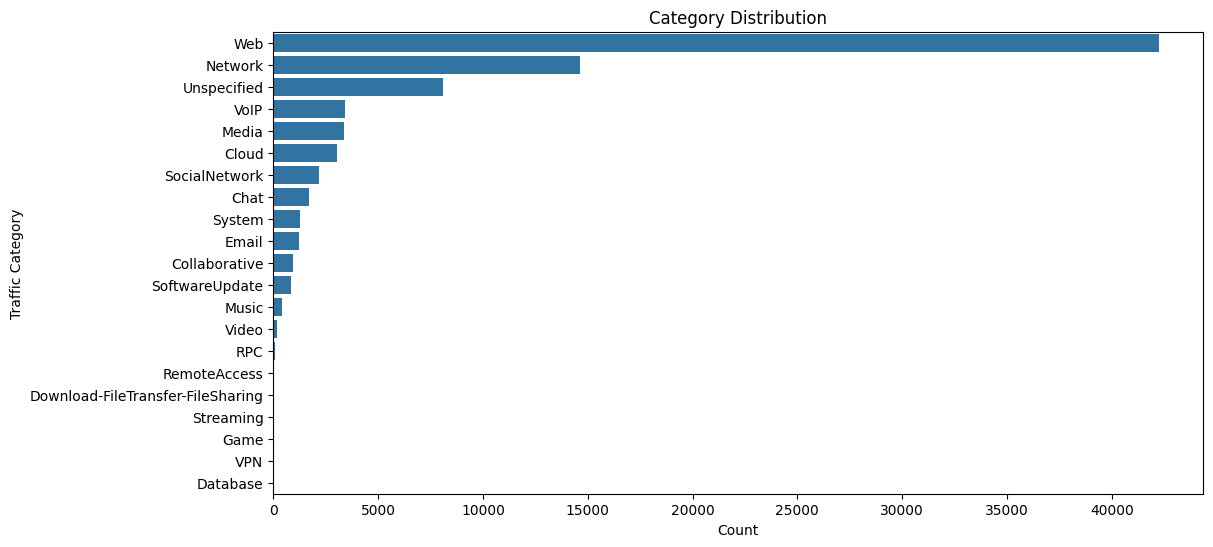

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Traffic Category')
plt.show()


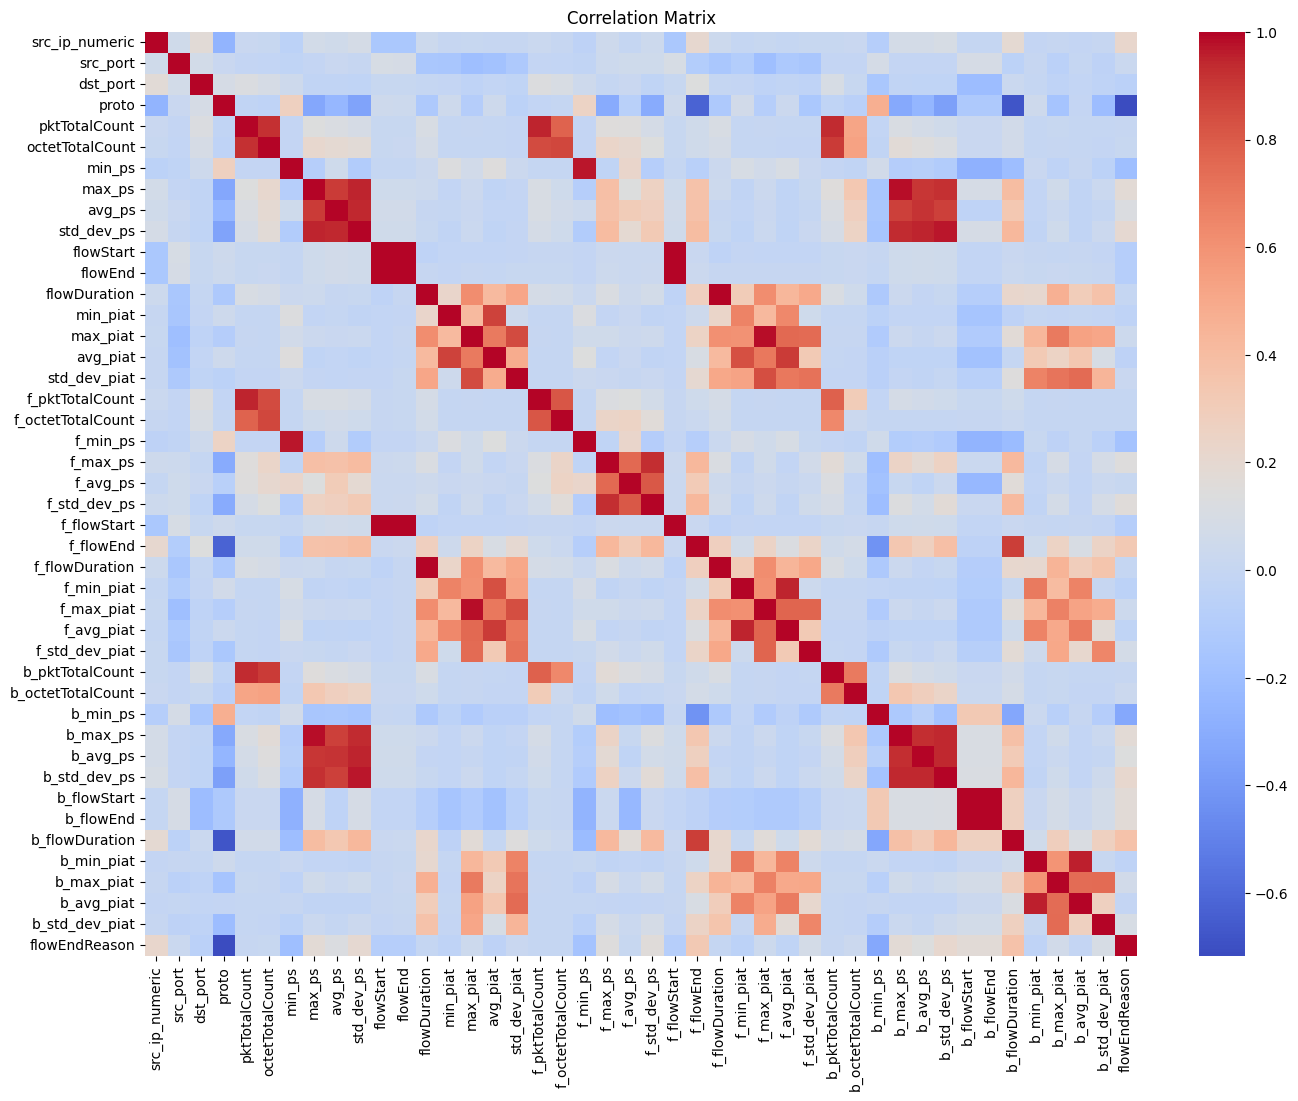

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16,12))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


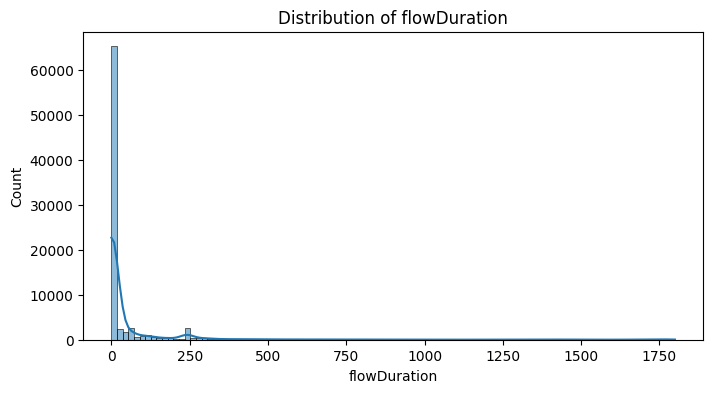

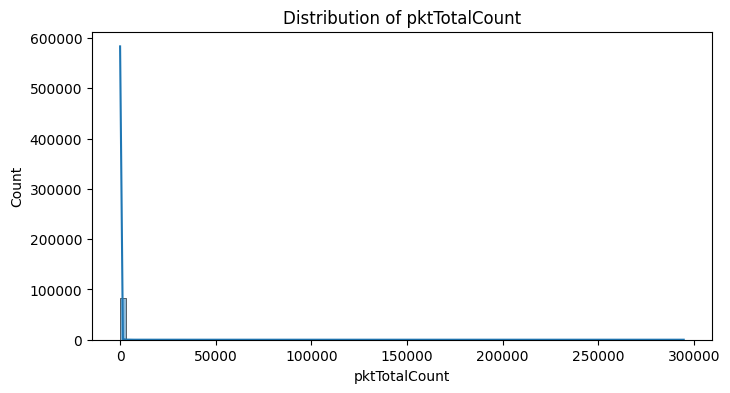

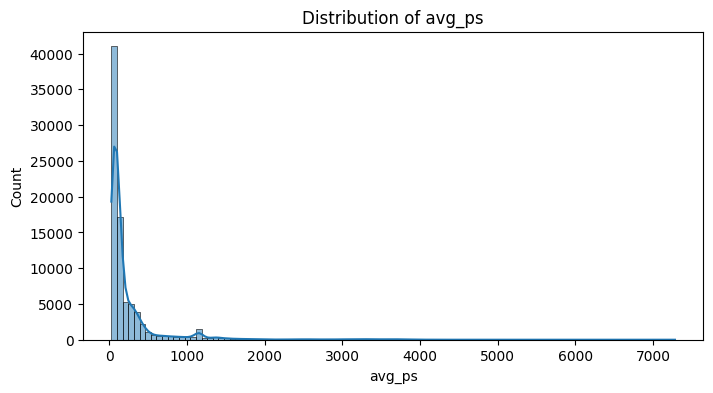

In [ ]:
for col in ['flowDuration', 'pktTotalCount', 'avg_ps']:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=100, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


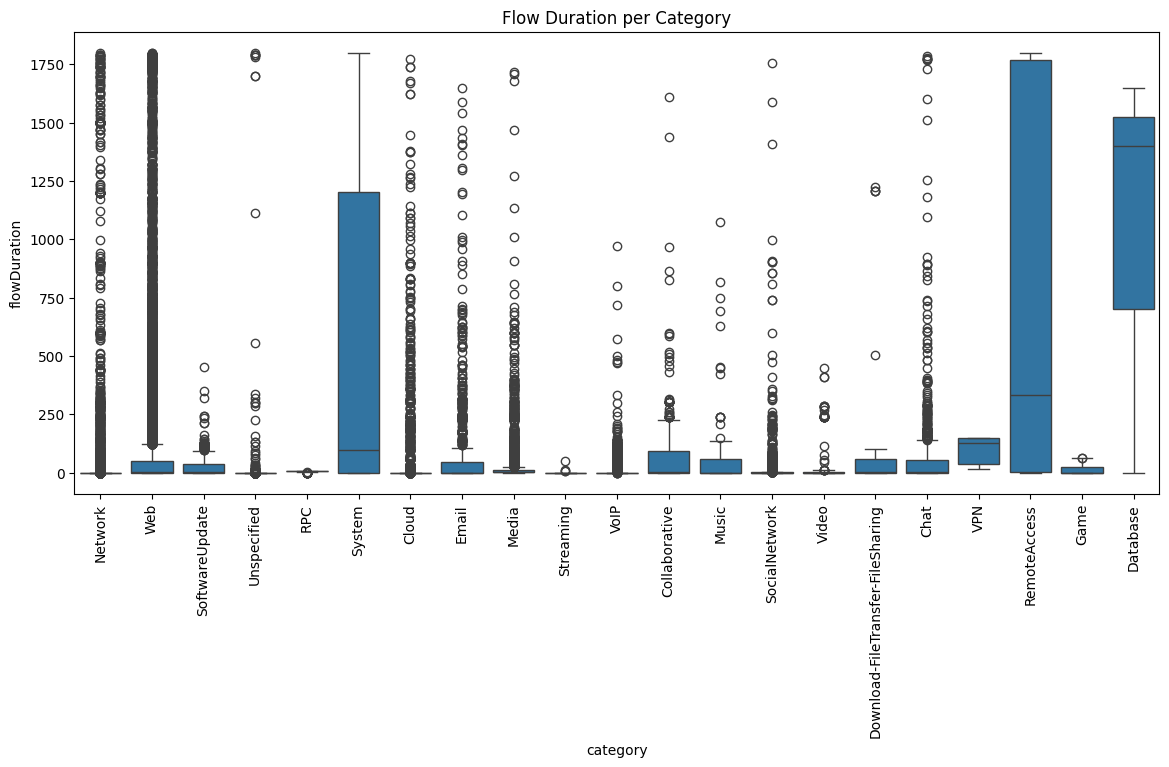

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='category', y='flowDuration')
plt.xticks(rotation=90)
plt.title('Flow Duration per Category')
plt.show()


In [ ]:
df.isnull().sum().sort_values(ascending=False)


,0
flowDuration,1
max_piat,1
min_piat,1
f_std_dev_piat,1
f_avg_piat,1
f_max_piat,1
f_min_piat,1
f_flowDuration,1
f_flowEnd,1
f_flowStart,1


# Cleaning Data

In [ ]:
df = df.dropna()
df.isnull().sum()

,0
flow_key,0
src_ip_numeric,0
src_ip,0
src_port,0
dst_ip,0
dst_port,0
proto,0
pktTotalCount,0
octetTotalCount,0
min_ps,0


<Axes: title={'center': 'Class Distribution'}, xlabel='category'>

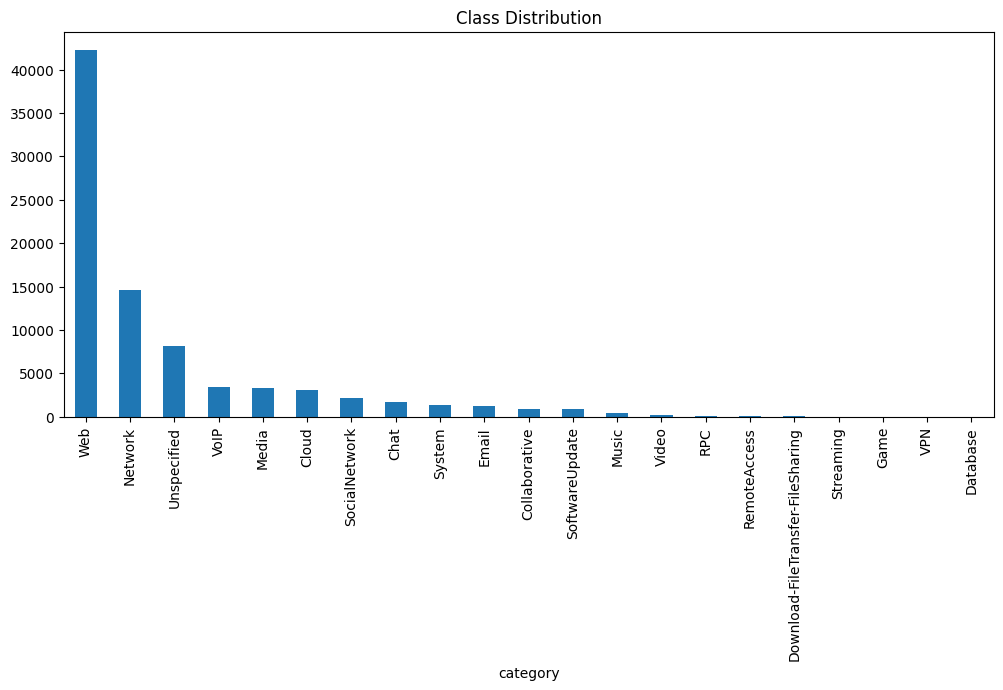

In [ ]:
df['category'].value_counts().plot(kind='bar', figsize=(12, 5), title='Class Distribution')


In [ ]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
src_ip_numeric,83830.0,3.232267e+09,1.207392e+02,3.232266e+09,3.232267e+09,3.232267e+09,3.232267e+09,3.232267e+09
src_port,83830.0,4.978218e+04,1.520334e+04,0.000000e+00,4.995200e+04,5.242400e+04,5.876375e+04,6.553400e+04
dst_port,83830.0,2.217726e+03,7.801844e+03,0.000000e+00,5.300000e+01,4.430000e+02,9.930000e+02,6.550000e+04
proto,83830.0,1.117354e+01,5.496242e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.700000e+01,1.700000e+01
pktTotalCount,83830.0,9.154329e+01,1.534939e+03,1.000000e+00,2.000000e+00,3.000000e+00,2.200000e+01,2.946940e+05
octetTotalCount,83830.0,1.078288e+05,1.885065e+06,2.900000e+01,1.560000e+02,2.880000e+02,6.038250e+03,2.881543e+08
min_ps,83830.0,5.586981e+01,5.763590e+01,2.900000e+01,4.000000e+01,4.000000e+01,6.400000e+01,1.500000e+03
max_ps,83830.0,1.530555e+03,3.831196e+03,2.900000e+01,7.700000e+01,1.530000e+02,1.458000e+03,2.632000e+04
avg_ps,83830.0,2.590624e+02,4.713261e+02,2.900000e+01,6.600000e+01,1.051026e+02,2.372388e+02,7.281109e+03
std_dev_ps,83830.0,3.268828e+02,7.481234e+02,0.000000e+00,6.000000e+00,4.100000e+01,4.152148e+02,8.403325e+03


#  Pairplot or PCA (Optional for High-Dimensional Visualization)

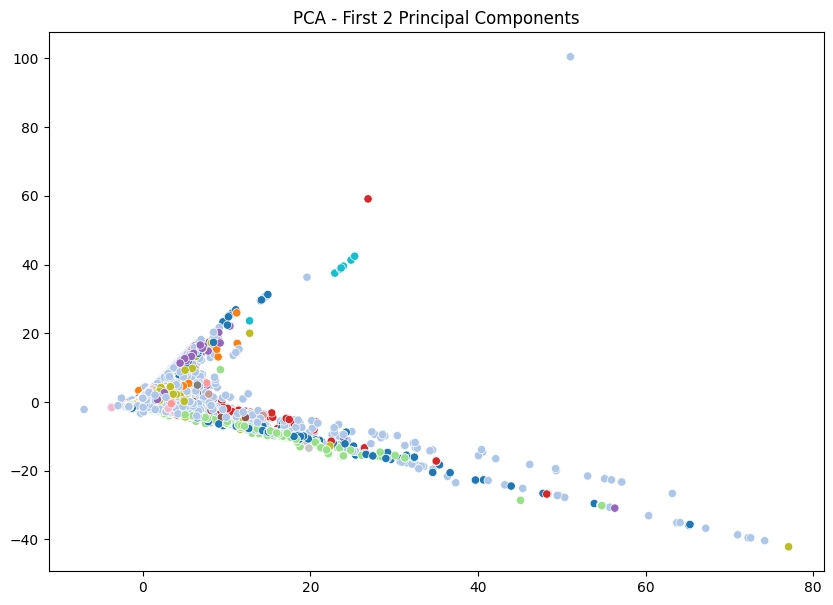

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df.select_dtypes(include=['float64', 'int64']))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['category'], legend=False, palette='tab20')
plt.title('PCA - First 2 Principal Components')
plt.show()


# Data Preparation

In [ ]:
df = df.drop(['flow_key', 'src_ip', 'dst_ip', 'web_service'], axis=1)


**Encode Categorical Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
df['category_encoded'] = le_cat.fit_transform(df['category'])

le_app = LabelEncoder()
df['application_protocol_encoded'] = le_app.fit_transform(df['application_protocol'])

# Optional: proto may already be numeric; skip if it's an integer.


In [ ]:
df = df.drop(['category', 'application_protocol'], axis=1)


In [ ]:
X = df.drop(['category_encoded'], axis=1)
y = df['category_encoded']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Starting Point:Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le_cat.classes_))


                                   precision    recall  f1-score   support

                             Chat       0.93      0.78      0.85       345
                            Cloud       0.98      0.88      0.93       610
                    Collaborative       0.97      0.63      0.76       185
                         Database       0.00      0.00      0.00         1
Download-FileTransfer-FileSharing       1.00      1.00      1.00         5
                            Email       0.97      0.76      0.85       250
                             Game       1.00      0.50      0.67         4
                            Media       0.96      0.77      0.86       673
                            Music       1.00      0.86      0.92        83
                          Network       1.00      1.00      1.00      2929
                              RPC       1.00      0.93      0.97        15
                     RemoteAccess       1.00      1.00      1.00         9
                    Soci

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


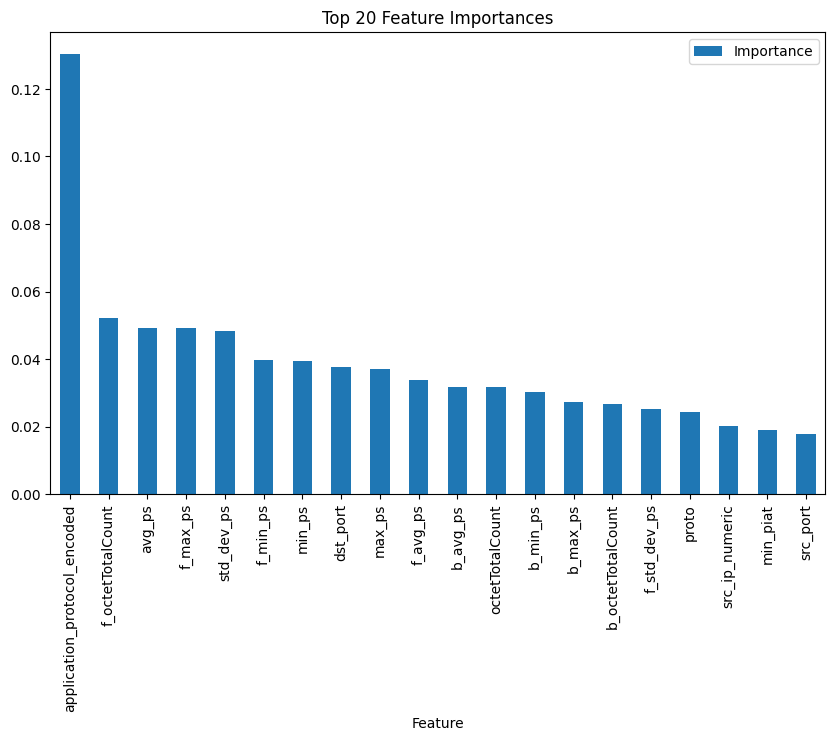

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False).head(20).plot.bar(x='Feature', y='Importance', figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.show()



# Handling Class Imbalance with SMOTE

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter


In [ ]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({20: 33803, 9: 11714, 16: 6483, 19: 2740, 7: 2691, 1: 2439, 12: 1757, 0: 1381, 15: 1037, 5: 998, 2: 740, 13: 668, 8: 332, 18: 125, 10: 58, 11: 34, 4: 21, 14: 18, 6: 18, 17: 5, 3: 2})
After SMOTE: Counter({16: 33803, 20: 33803, 13: 33803, 9: 33803, 2: 33803, 15: 33803, 8: 33803, 5: 33803, 1: 33803, 0: 33803, 7: 33803, 19: 33803, 11: 33803, 12: 33803, 18: 33803, 10: 33803, 4: 33803, 14: 33803, 6: 33803, 17: 33803, 3: 33803})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

y_pred = rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       345
           1       0.93      0.90      0.91       610
           2       0.77      0.68      0.72       185
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       0.84      0.82      0.83       250
           6       0.80      1.00      0.89         4
           7       0.87      0.81      0.84       673
           8       0.97      0.86      0.91        83
           9       1.00      1.00      1.00      2929
          10       1.00      0.93      0.97        15
          11       1.00      1.00      1.00         9
          12       0.80      0.82      0.81       439
          13       0.89      0.86      0.88       167
          14       1.00      0.25      0.40         4
          15       1.00      1.00      1.00       259
          16       1.00      1.00      1.00      1621
          17       1.00    

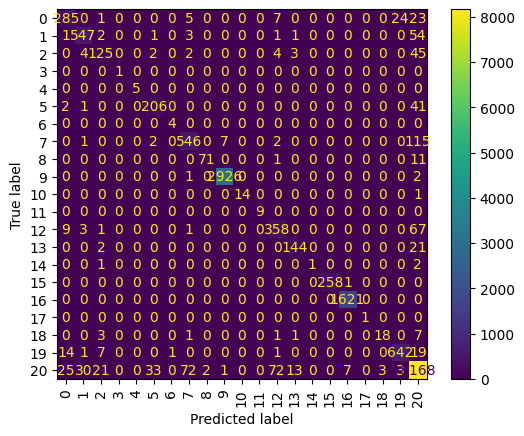

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation=90)


# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print(classification_report(y_test, xgb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.91      0.78      0.84       345
           1       0.96      0.89      0.92       610
           2       0.93      0.66      0.77       185
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         5
           5       0.94      0.82      0.88       250
           6       0.00      0.00      0.00         4
           7       0.95      0.79      0.86       673
           8       1.00      0.87      0.93        83
           9       1.00      1.00      1.00      2929
          10       1.00      0.93      0.97        15
          11       1.00      1.00      1.00         9
          12       0.89      0.75      0.81       439
          13       0.97      0.84      0.90       167
          14       0.00      0.00      0.00         4
          15       1.00      1.00      1.00       259
          16       1.00      1.00      1.00      1621
          17       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
df

,src_ip_numeric,src_port,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,...,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,flowEndReason,category_encoded,application_protocol_encoded
0,3232266497,67,67,17,22,7620,328,394,346.363636,25.010081,...,1.555955e+09,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,2.0,9,7
1,3232266497,67,67,17,17,5670,328,354,333.529412,9.140200,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.0,9,7
2,3232266497,67,67,17,43,15124,328,394,351.720930,26.098495,...,1.555964e+09,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,2.0,9,7
3,3232266497,67,67,17,30,10086,328,352,336.200000,10.057833,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.0,9,7
4,3232266497,0,0,1,1,56,56,56,56.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.0,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83825,3232266828,62224,80,6,16,10276,40,3197,642.250000,1050.054136,...,1.555967e+09,1.555967e+09,1.554411e+12,1.001358e-05,13.166150,1.792222,4.310258,3.0,20,1
83826,3232266828,62240,443,6,28,10708,40,3838,382.428571,913.020436,...,1.555967e+09,1.555967e+09,1.554411e+12,3.099442e-06,0.442974,0.085185,0.135311,3.0,20,6
83827,3232266828,62241,443,6,26,10525,40,4420,404.807692,990.151232,...,1.555967e+09,1.555967e+09,1.554411e+12,7.867813e-06,0.314683,0.049258,0.094232,3.0,20,6
83828,3232266828,62231,80,6,15,6548,40,2088,436.533333,702.783880,...,1.555967e+09,1.555967e+09,1.554411e+12,1.907349e-06,0.162948,0.049364,0.069845,4.0,20,1
